In [14]:
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['id', 'entity', 'sentiment', 'text']
df.head()


,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [15]:
df['sentiment'].value_counts()


sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [16]:
df = df[df['sentiment'].isin(['positive', 'negative', 'neutral'])]


In [17]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

df['vader_score'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['vader_sentiment'] = df['vader_score'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
print(df[['sentiment', 'vader_sentiment']].head())
print(df['sentiment'].unique())
print(df['vader_sentiment'].unique())


Empty DataFrame
Columns: [sentiment, vader_sentiment]
Index: []
[]
[]


In [20]:
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['id', 'entity', 'sentiment', 'text']

print("Unique Sentiment Labels in File:")
print(df['sentiment'].unique())


Unique Sentiment Labels in File:
['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [21]:
# Make labels lowercase
df['sentiment'] = df['sentiment'].str.lower()

# Keep only valid sentiment classes
df = df[df['sentiment'].isin(['positive', 'negative', 'neutral'])]


In [22]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df['vader_score'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['vader_sentiment'] = df['vader_score'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyError: 'clean_text'

In [23]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Create the 'clean_text' column
df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove links
    text = re.sub(r'\@\w+|\#','', text)                  # remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)              # remove special characters/numbers
    text = " ".join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()


,text,clean_text
0,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,I am coming to the borders and I will kill you...,coming borders kill
2,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,im coming on borderlands and i will murder you...,im coming borderlands murder
4,im getting on borderlands 2 and i will murder ...,im getting borderlands murder


In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

df['vader_score'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

df['vader_sentiment'] = df['vader_score'].apply(
    lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral')
)


In [26]:
df['sentiment'] = df['sentiment'].str.lower()
df = df[df['sentiment'].isin(['positive', 'negative', 'neutral'])]


In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df['sentiment'], df['vader_sentiment'])
print(f" VADER Sentiment Accuracy: {accuracy:.2f}")


 VADER Sentiment Accuracy: 0.49


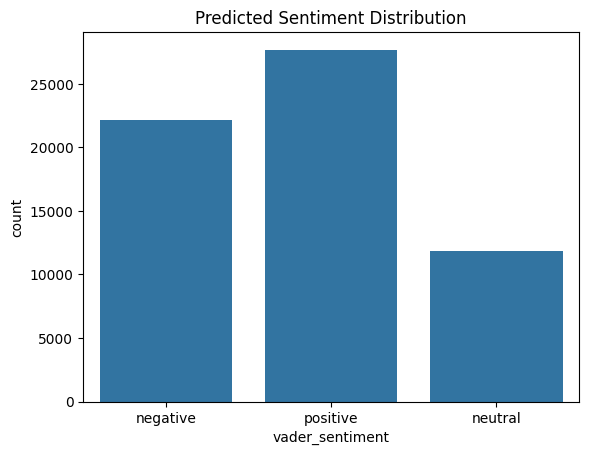

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='vader_sentiment', data=df)
plt.title("Predicted Sentiment Distribution")
plt.show()



C:\Users\Dell\AppData\Local\Temp\ipykernel_6364\2297310395.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='vader_sentiment', data=df, palette='Set2')


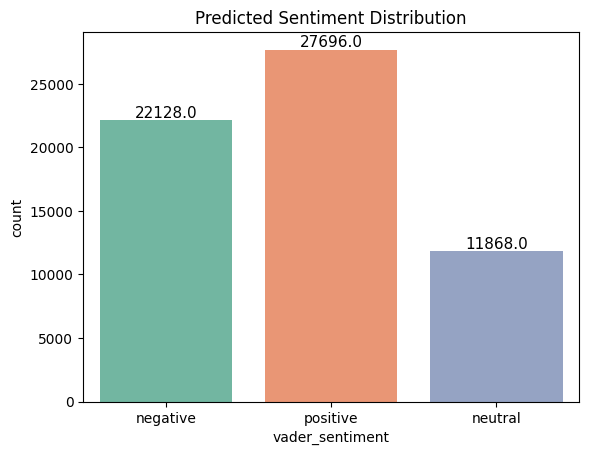

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='vader_sentiment', data=df, palette='Set2')
plt.title("Predicted Sentiment Distribution")

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


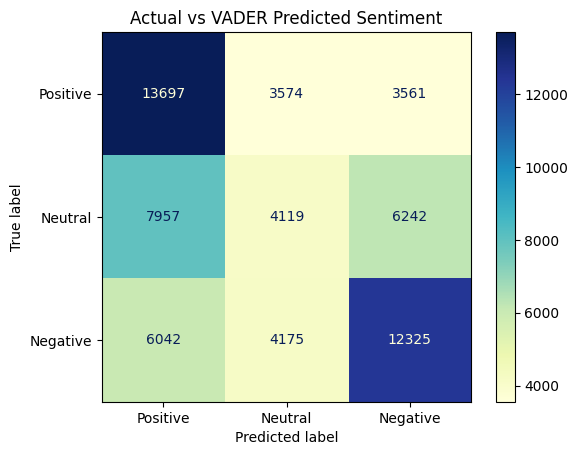

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df['sentiment'], df['vader_sentiment'], labels=['positive', 'neutral', 'negative'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative'])
disp.plot(cmap='YlGnBu')
plt.title("Actual vs VADER Predicted Sentiment")
plt.show()


In [33]:
df.to_csv("twitter_sentiment_output.csv", index=False)
print("✅ Output saved as twitter_sentiment_output.csv")


✅ Output saved as twitter_sentiment_output.csv


In [34]:
df.isnull().sum()


id                   0
entity               0
sentiment            0
text               571
clean_text           0
vader_score          0
vader_sentiment      0
dtype: int64

In [35]:
df_cleaned = df.dropna(subset=['text'])


In [36]:
df_cleaned.to_csv("twitter_sentiment_output_cleaned.csv", index=False)
print("✅ Cleaned file saved as twitter_sentiment_output_cleaned.csv")


✅ Cleaned file saved as twitter_sentiment_output_cleaned.csv


In [37]:
df_cleaned.isnull().sum()


id                 0
entity             0
sentiment          0
text               0
clean_text         0
vader_score        0
vader_sentiment    0
dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_6364\3739728201.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_sentiment', data=df, palette='Set2')


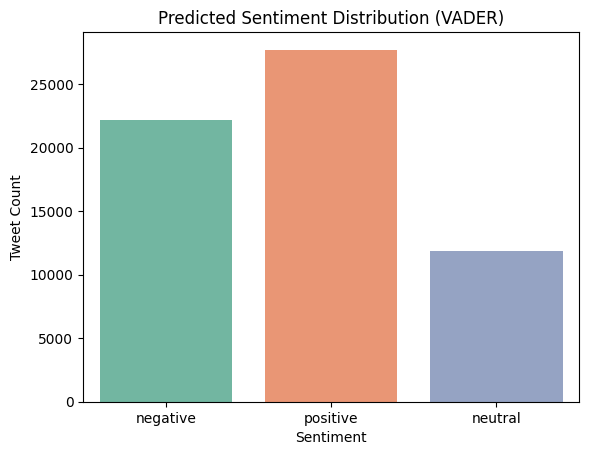

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='vader_sentiment', data=df, palette='Set2')
plt.title("Predicted Sentiment Distribution (VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


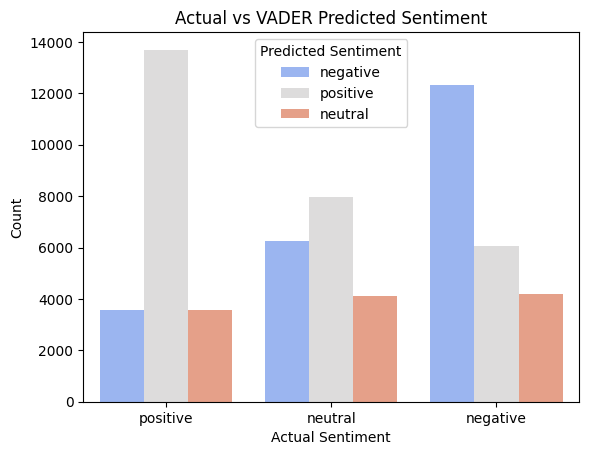

In [39]:
sns.countplot(x='sentiment', hue='vader_sentiment', data=df, palette='coolwarm')
plt.title("Actual vs VADER Predicted Sentiment")
plt.xlabel("Actual Sentiment")
plt.ylabel("Count")
plt.legend(title='Predicted Sentiment')
plt.show()


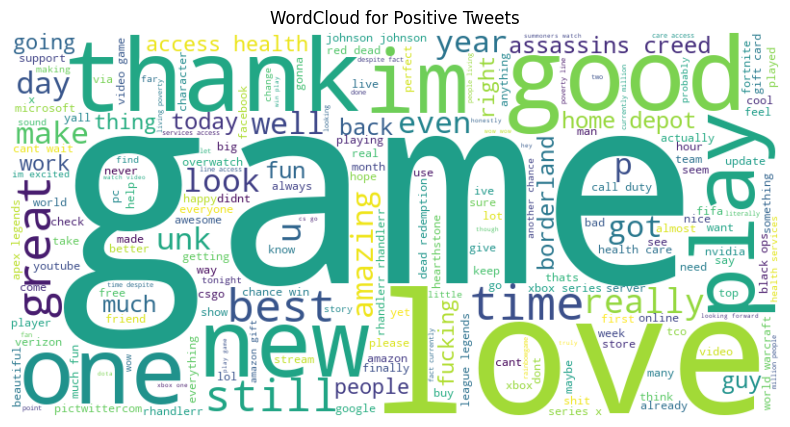

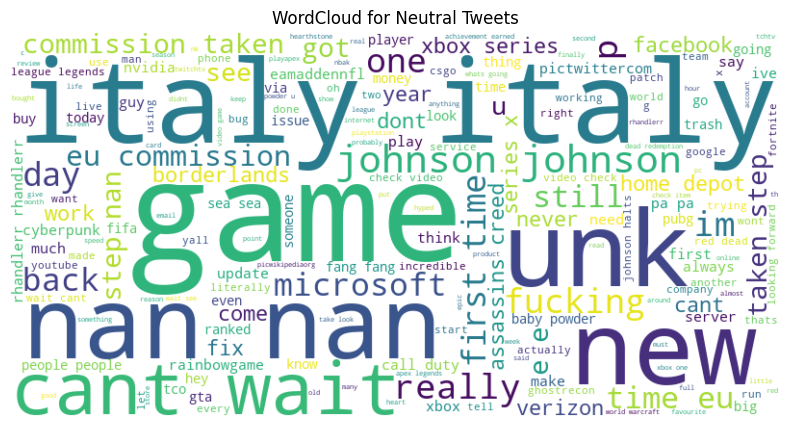

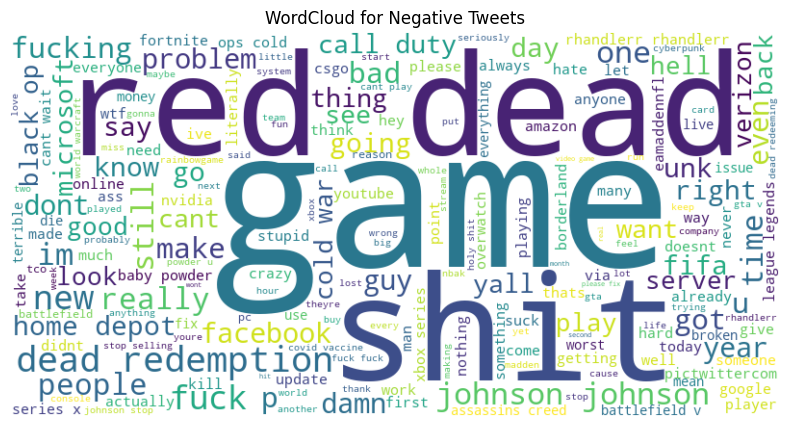

In [40]:
from wordcloud import WordCloud

for sentiment in ['positive', 'neutral', 'negative']:
    text = " ".join(df[df['vader_sentiment'] == sentiment]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment.capitalize()} Tweets")
    plt.show()


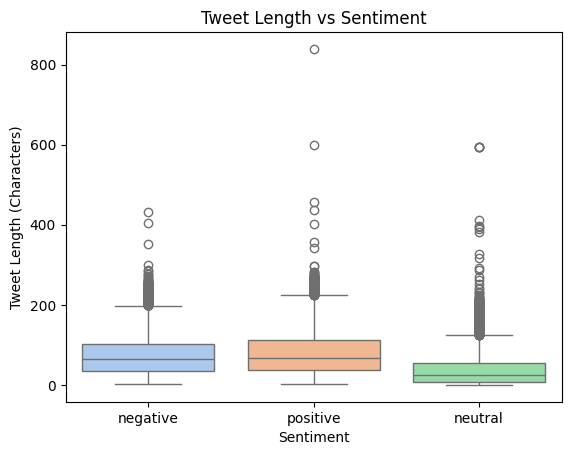

In [42]:
df['tweet_length'] = df['clean_text'].apply(len)

sns.boxplot(x='vader_sentiment', y='tweet_length', hue='vader_sentiment', data=df, palette='pastel', legend=False)
plt.title("Tweet Length vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length (Characters)")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_6364\2244431076.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vader_sentiment', y='tweet_length', data=df, palette='pastel')


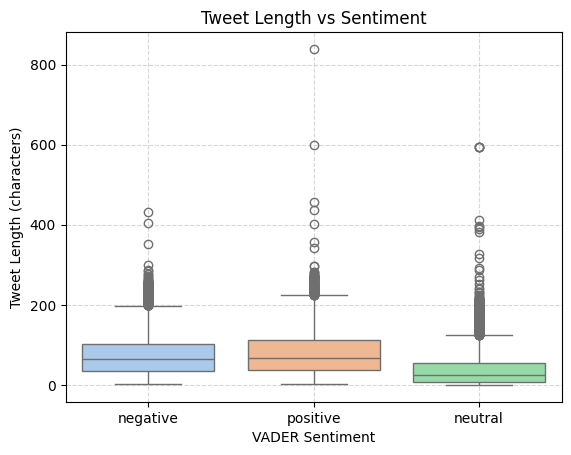

In [43]:
sns.boxplot(x='vader_sentiment', y='tweet_length', data=df, palette='pastel')
plt.title("Tweet Length vs Sentiment")
plt.xlabel("VADER Sentiment")
plt.ylabel("Tweet Length (characters)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [44]:
df.to_csv("twitter_sentiment_output_cleaned.csv", index=False, encoding='utf-8')
